## GPGP Imports

In [1]:
from enum import Enum
from gbgp import *

## Implementation of Arithmetic grammar

![img/ArithmeticGrammar.png](img/ArithmeticGrammar.png)

In [2]:
# A context for evaluating arithmetic expressions.
class ArithmeticContext(EvaluationContext):
    x: int
    y: int

    def __init__(self, x: int, y: int):
        super().__init__()
        self.x = x
        self.y = y


# The grammar terms.
class Terms(Enum):
    Var = 1
    Plus = 2
    Times = 3
    LeftParenthesis = 4
    RightParenthesis = 5
    Expr = 6
    Term = 7
    Factor = 8


# Declaration of terminals.
varTerm = Terminal(Terms.Var.value, "var", ["x", "y", "1"])
plusTerm = Terminal(Terms.Plus.value, "Plus", ["+"])
timesTerm = Terminal(Terms.Times.value, "Times", ["*"])
leftParenthesisTerm = Terminal(Terms.LeftParenthesis.value, "LeftParenthesis", ["("])
rightParenthesisTerm = Terminal(Terms.RightParenthesis.value, "RightParenthesis", [")"])

# Declaration of non-terminals.
exprNonTerm = NonTerminal(Terms.Expr.value, "EXPR")
termNonTerm = NonTerminal(Terms.Term.value, "TERM")
factorNonTerm = NonTerminal(Terms.Factor.value, "FACTOR")


# Declaration of production rules and their semantic actions.
def semantic_action1(ctx: EvaluationContext):
    n1 = int(ctx.SemanticValue(0))
    n2 = int(ctx.SemanticValue(2))
    ctx.SetResult(str(n1 + n2))


rule1 = ProductionRule(exprNonTerm,
                       [ProductionElement(exprNonTerm), ProductionElement(plusTerm), ProductionElement(termNonTerm)],
                       semantic_action1)

rule2 = ProductionRule(exprNonTerm, [ProductionElement(termNonTerm)])


def semantic_action3(ctx: EvaluationContext):
    n1 = int(ctx.SemanticValue(0))
    n2 = int(ctx.SemanticValue(2))
    ctx.SetResult(str(n1 * n2))


rule3 = ProductionRule(termNonTerm,
                       [ProductionElement(termNonTerm), ProductionElement(timesTerm), ProductionElement(factorNonTerm)],
                       semantic_action3)

rule4 = ProductionRule(termNonTerm, [ProductionElement(factorNonTerm)])
rule5 = ProductionRule(factorNonTerm,
                       [
                           ProductionElement(leftParenthesisTerm),
                           ProductionElement(exprNonTerm),
                           ProductionElement(rightParenthesisTerm)
                       ],
                       1)


def semantic_action6(ctx: EvaluationContext):
    var = ctx.SemanticValue(0)
    if var == "x":
        var_value = ctx.x
    elif var == "y":
        var_value = ctx.y
    else:
        var_value = 1
    ctx.SetResult(str(var_value))


rule6 = ProductionRule(factorNonTerm, [ProductionElement(varTerm)], semantic_action6)

# Declaration of the grammar.
grammar = Grammar([rule1, rule2, rule3, rule4, rule5, rule6])

In [3]:
def target_function(x: int, y: int) -> int:
    return 1 + 2 * x + y * y * y


def fitness_function(solution: SyntaxTree) -> float:
    diff = []
    for x in range(9):
        for y in range(9):
            ctx = ArithmeticContext(x, y)
            solution.Evaluate(ctx)

            solution_value = int(ctx.GetResult())
            expected_value = target_function(x, y)
            diff.append(abs(solution_value - expected_value))

    error = sum(diff) / len(diff)
    return 1.0 / (1.0 + error)

In [4]:
env = Environment(grammar, fitness_function, 200, 100, 5, 5, 0.4)
last_generation = env.GetPopulation()
fittest = last_generation.GetFittestByRank(0)

i = 0
while i < 50 and fittest.GetFitness() < 1:
    env.Optimize()
    last_generation = env.GetPopulation()
    fittest = last_generation.GetFittestByRank(0)
    print(str(i) + "\t|\t" + str(fittest.GetFitness()) + "\t|\t" + str(fittest.GetExpression()))
    i += 1

0	|	0.23684210526315788	|	(y*y*y)+1+1+x
1	|	0.23684210526315788	|	(y*y*y)+1+1+x
2	|	0.23684210526315788	|	(y*y*y)+1+1+x
3	|	0.23684210526315788	|	(y*y*y)+1+1+x
4	|	0.24545454545454543	|	x+1*(y*y*y+y)
5	|	0.25233644859813087	|	(y*1*y*y)+1+y+x
6	|	0.25233644859813087	|	(y*y*y)+y+1+x
7	|	0.25233644859813087	|	(y*y*y)+y+1+x
8	|	0.25233644859813087	|	(y*1*y*y)+1+y+x
9	|	0.25233644859813087	|	(y*y*y)+y+1+x
10	|	0.25233644859813087	|	(y*y*y)+y+1+x
11	|	0.25233644859813087	|	(y*y*y)+y+1+x
12	|	0.25233644859813087	|	(y*y*y)+y+1+x
13	|	0.5	|	(y*y*y)+(x+(x*1))
14	|	0.5	|	(y*y*y)+(x+(x*1))
15	|	0.5	|	(y*y*y)+(x+(x*1))
16	|	0.5	|	(y*y*y)+(x+(x*1))
17	|	0.5	|	(y*y*y)+(x+(x*1))
18	|	0.5	|	(y*y*y)+(x+(x*1))
19	|	0.5	|	(y*y*y)+(x+(x*1))
20	|	0.5	|	(y*y*y)+(x+(x*1))
21	|	1.0	|	y*y*y+x+x+1


In [6]:
graph = fittest.GetTree().ToGraph()

In [7]:
nodes = graph.GetNodeIndexes()
edges = graph.GetEdges()
labels = graph.GetLabels()

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

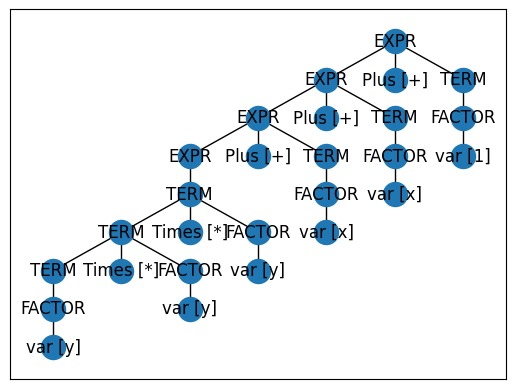

<Figure size 1200x1200 with 0 Axes>

In [9]:
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.figure(3,figsize=(12,12)) 
plt.show()